# Условие
В этом соревновании ваша задача состоит в том, чтобы предсказать, был ли пассажир перенесен в другое измерение во время столкновения космического корабля "Титаник " с пространственно-временной аномалией. Чтобы помочь вам сделать эти прогнозы, вам дается набор личных записей, извлеченных из поврежденной компьютерной системы корабля.

`PassengerId` - Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму gggg_pp, где gggg указывает группу, с которой путешествует пассажир, и ppявляется их номером в группе. Люди в группе часто являются членами семьи, но не всегда.

`HomePlanet` - Планета, с которой вылетел пассажир, как правило, планета его постоянного проживания.

`CryoSleep` - Указывает, решил ли пассажир быть переведен в режим анабиоза на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.

`Cabin` - Номер каюты, в которой находится пассажир. Принимает вид deck/num/side, где sideможет быть либо P за левый , либо S за правый борт .

`Destination` - Планета, на которую будет высаживаться пассажир.

`Age` - Возраст пассажира.

`VIP` - Оплатил ли пассажир специальное VIP-обслуживание во время рейса.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .

`Name` - Имя и фамилия пассажира.

`Transported` - Был ли пассажир перенесён в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.

# Анализ данных

In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Смотрим на процент пропусков для каждого признака

In [ ]:
data.isna().mean().sort_values(ascending = False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

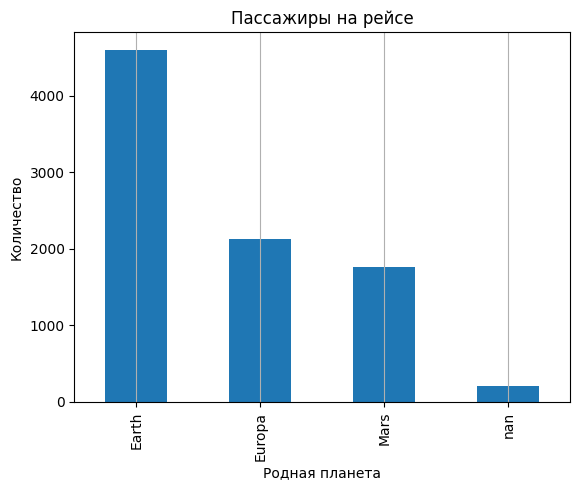

In [ ]:
import matplotlib.pyplot as plt

data['HomePlanet'].value_counts(dropna=False).plot.bar()

plt.title('Пассажиры на рейсе')
plt.xlabel('Родная планета')
plt.ylabel('Количество')
plt.grid (axis='x')

plt.show()

Поделим признаки на несколько

In [ ]:
data[['deck', 'num', 'side']] = data['Cabin'].str.split('/', expand=True)
del data['Cabin']

data[['group_id', 'num_id']] = data['PassengerId'].str.split('_', expand=True)
del data['PassengerId']

data[['name', 'surname']] = data['Name'].str.split(' ', expand=True)
del data['Name']

data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,group_id,num_id,name,surname
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0001,01,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0002,01,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0003,01,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0003,02,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0004,01,Willy,Santantines


In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

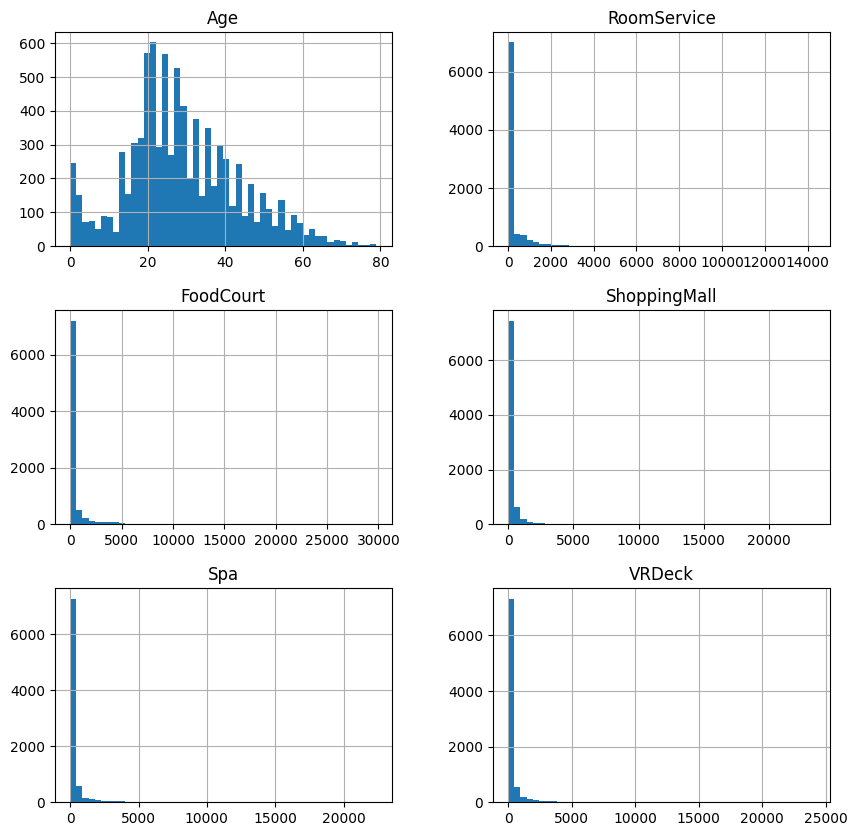

In [ ]:
data.hist(figsize = (10,10), bins = 50)

<ipython-input-214-b764711d9f67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

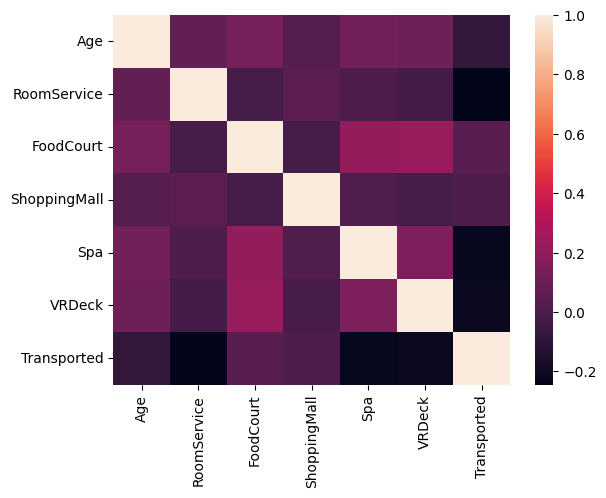

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
data['VIP'] = data['VIP'].astype(str)
data['CryoSleep'] = data['CryoSleep'].astype(str)

Посмотрим на группы

In [ ]:
data['group_id'].unique().shape

(6217,)

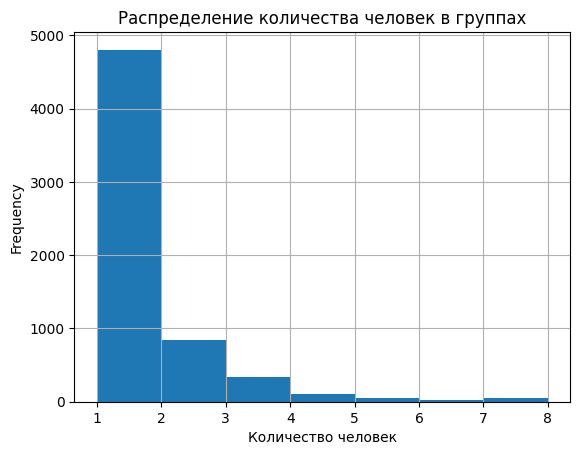

In [ ]:
data['group_id'].value_counts(dropna=False).plot.hist(bins = 7)
plt.title('Распределение количества человек в группах')
plt.xlabel('Количество человек')
plt.grid (axis='both')

plt.show()

Добавим новый признак -- количество человек в группе

In [ ]:
group_size = data['group_id'].value_counts(dropna=False)
group_size.name = 'group_size'
data = data.join(group_size, on = 'group_id')
data.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,group_id,num_id,name,surname,group_size
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0001,01,Maham,Ofracculy,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0002,01,Juanna,Vines,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0003,01,Altark,Susent,2
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0003,02,Solam,Susent,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0004,01,Willy,Santantines,1


Посмотрим среднее значение выживаемости в группах

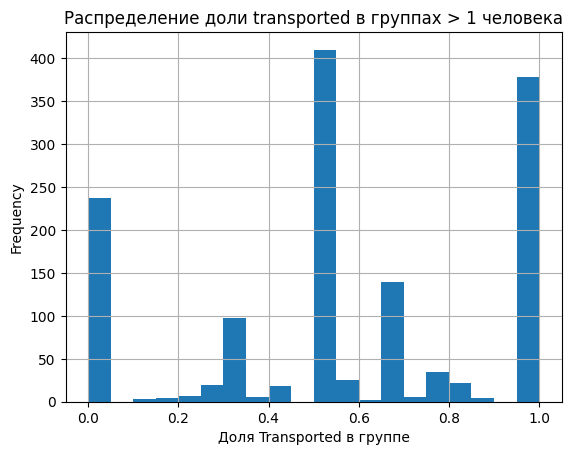

In [ ]:
data[data['group_size'] > 1].groupby('group_id')['Transported'].mean().plot.hist(bins = 20)
plt.title('Распределение доли transported в группах > 1 человека')
plt.xlabel('Доля Transported в группе')
plt.grid (axis='both')

plt.show()

Добавим признак -- доля людей, transported в группе

In [ ]:
group_transported_probability = data.groupby('group_id')['Transported'].mean()
group_transported_probability.name = 'group_transported_probability'
data = data.join(group_transported_probability, on = 'group_id')
data.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,group_id,num_id,name,surname,group_size,group_transported_probability
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0001,01,Maham,Ofracculy,1,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0002,01,Juanna,Vines,1,1.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0003,01,Altark,Susent,2,0.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0003,02,Solam,Susent,2,0.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0004,01,Willy,Santantines,1,1.0


In [ ]:
import numpy as np
numeric_data = data.select_dtypes([np.number])
numeric_features = numeric_data.columns

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side']
not_numeric_features = list(data.dtypes[data.dtypes == "object"].index)

In [ ]:
from sklearn.model_selection import train_test_split

y = data['Transported']
X = data.drop(columns=['Transported'])

X[categorical_features] = X[categorical_features].fillna("NotGiven")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)
print('Размер тестовой выборки', y_test.shape[0])

Размер тестовой выборки 2174


Константная модель дает accuracy 0.5

<Axes: title={'center': 'target'}, ylabel='Transported'>

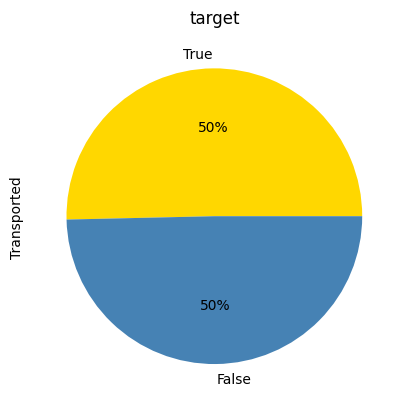

In [ ]:
plt.title('target')
y.value_counts().plot(kind='pie',autopct='%1.0f%%', colors = ['gold', 'steelblue'])

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, classification_report
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2


numeric_transformer = Pipeline(
    steps=[("imputer", KNNImputer(n_neighbors=3)), ('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('На тесте\n', classification_report(y_test_pred, y_test))

На тесте
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      1114
        True       0.95      0.94      0.94      1060

    accuracy                           0.95      2174
   macro avg       0.95      0.95      0.95      2174
weighted avg       0.95      0.95      0.95      2174



In [ ]:
data['name'].unique().shape

(2707,)

In [ ]:
data['surname'].unique().shape

(2218,)

In [ ]:
data['num_id'].unique().shape

(8,)

In [ ]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", preprocessor.transform(X_train).shape)

Size before OneHot: (6519, 19)
Size after OneHot: (6519, 21)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "preprocessor__numeric__imputer__n_neighbors": [3,4],
    "preprocessor__categorical__selector__percentile": [20, 25, 30, 35],
    "classifier__C": [25, 40, 50, 60],
}

search_cv = GridSearchCV(model, param_grid, scoring= 'recall')
search_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=3)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'group_size', 'group_transported_probability'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('enc...
                                                                                          SelectPercentile(percentile=50,
                                                                                                           score_func=<function chi2 at 0x7e2e0ebbf640>))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'deck',
                                                                          'side'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [25, 40, 50, 60],
                         'preprocessor__categorical__selector__percentile': [20,
                                                                             25,
                                                                             30,
                                                                             35],
                         'preprocessor__numeric__imputer__n_neighbors': [3, 4]},
             scoring='recall')

In [ ]:
print("Best params:")
print(search_cv.best_params_)

Best params:
{'classifier__C': 25, 'preprocessor__categorical__selector__percentile': 25, 'preprocessor__numeric__imputer__n_neighbors': 3}


In [ ]:
y_pred = search_cv.predict(X_test)
print(classification_report(y_pred, y_test,digits=3))

              precision    recall  f1-score   support

       False      0.940     0.956     0.948      1113
        True      0.953     0.936     0.944      1061

    accuracy                          0.946      2174
   macro avg      0.946     0.946     0.946      2174
weighted avg      0.946     0.946     0.946      2174



<Axes: ylabel='Frequency'>

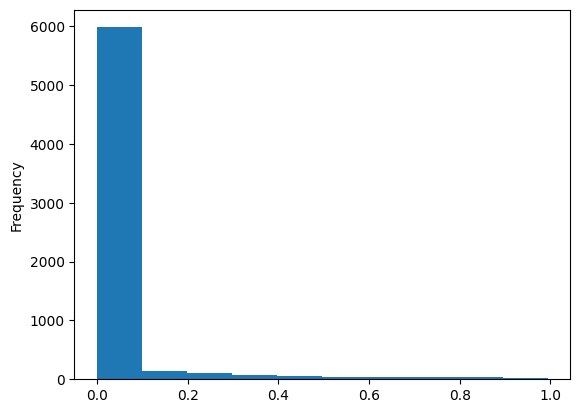

In [ ]:
import seaborn as sns
error = (y_train - search_cv.predict_proba(X_train)[:,1]) ** 2
error.plot.hist()

In [ ]:
mask = (error < np.quantile(error, 0.98))

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=3)),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(percentile=50)),
    ]
)

data_transformer = ColumnTransformer(transformers=[
    ("numeric", numeric_transformer, numeric_features),
    ("categorical", categorical_transformer, categorical_features),
])

preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(C=25))]
)

model.fit(X_train[mask], y_train[mask])
y_test_pred = model.predict(X_test)
print('На тесте\n', classification_report(y_test_pred, y_test, digits = 3))

На тесте
               precision    recall  f1-score   support

       False      0.943     0.954     0.948      1118
        True      0.951     0.938     0.945      1056

    accuracy                          0.947      2174
   macro avg      0.947     0.946     0.947      2174
weighted avg      0.947     0.947     0.947      2174



Проверить нерассмотренные признаки. Проверить что группа сильно влияет и внутри одной группы либо все выжили либо нет


In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='ShoppingMall', ylabel='FoodCourt'>

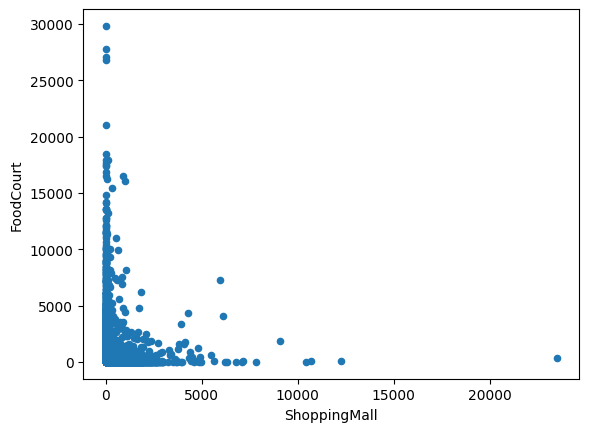

In [ ]:
data.plot.scatter(x='ShoppingMall', y = 'FoodCourt')

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression(C=25)
clf2 = RandomForestClassifier(n_estimators=20)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors = 5)

blending_classifier = VotingClassifier(
    estimators=[("logreg", clf1),
                ("random_forest", clf2),
                ("gnb", clf3),
                ("knn", clf4)]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", blending_classifier)]
)

model.fit(X_train[mask], y_train[mask])
y_test_pred = model.predict(X_test)
print('На тесте\n', classification_report(y_test_pred, y_test,digits = 3))

На тесте
               precision    recall  f1-score   support

       False      0.952     0.952     0.952      1132
        True      0.948     0.948     0.948      1042

    accuracy                          0.950      2174
   macro avg      0.950     0.950     0.950      2174
weighted avg      0.950     0.950     0.950      2174



In [ ]:
model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('imputer',
                                                                                    KNNImputer(n_neighbors=2)),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('encoder',
                                                                                    OneHotEncoder(handle_unknown='ignore')),
                                                                                   ('selector',
                                                                                    SelectPercentile(percentile=40))]),
                                                                   ['HomePlanet',
                                                                    'CryoSleep',
                                                                    'Destination',
                                                                    'VIP',
                                                                    'deck',
                                                                    'side'])]))])),
                ('classifier',
                 VotingClassifier(estimators=[('logreg',
                                               LogisticRegression(C=50)),
                                              ('random_forest',
                                               RandomForestClassifier()),
                                              ('gnb', GaussianNB()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=18))]))])

In [ ]:
model.predict

In [ ]:
from sklearn.ensemble import StackingClassifier
import xgboost
from sklearn.svm import LinearSVC
estimators = [
    ("Random_Forest", RandomForestClassifier()),
    ("Xgboost", xgboost.XGBClassifier()),
    ("SVM", LinearSVC()),

]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

In [ ]:
stacking_classifier

StackingClassifier(estimators=[('Random_Forest', RandomForestClassifier()),
                               ('Xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_t...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('SVM', LinearSVC())],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [ ]:
model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", stacking_classifier)]
)

model.fit(X_train[mask], y_train[mask])
y_test_pred = model.predict(X_test)
print('На тесте\n', classification_report(y_test_pred, y_test,digits = 3))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


На тесте
               precision    recall  f1-score   support

       False      0.767     0.842     0.803      1031
        True      0.844     0.769     0.805      1143

    accuracy                          0.804      2174
   macro avg      0.805     0.805     0.804      2174
weighted avg      0.807     0.804     0.804      2174



In [ ]:
param_grid = {
    "classifier__final_estimator__C": [50, 100, 150],
}

search_cv = GridSearchCV(model, param_grid, scoring= 'recall')
search_cv.fit(X_train[mask], y_train[mask])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           KNNImputer(n_neighbors=2)),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('encoder',
                                                                                                           One...
                                                                                      max_leaves=None,
                                                                                      min_child_weight=None,
                                                                                      missing=nan,
                                                                                      monotone_constraints=None,
                                                                                      n_estimators=100,
                                                                                      n_jobs=None,
                                                                                      num_parallel_tree=None,
                                                                                      predictor=None,
                                                                                      random_state=None, ...)),
                                                                       ('SVM',
                                                                        LinearSVC())],
                                                           final_estimator=LogisticRegression(n_jobs=-1,
                                                                                              verbose=True),
                                                           n_jobs=-1,
                                                           verbose=True))]),
             param_grid={'classifier__final_estimator__C': [50, 100, 150]},
             scoring='recall')

In [ ]:
print("Best params:")
print(search_cv.best_params_)

Best params:
{'classifier__final_estimator__C': 100}


In [ ]:
y_pred = search_cv.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.77      0.84      0.80      1037
        True       0.84      0.77      0.80      1137

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.81      0.80      0.80      2174



In [ ]:
# numerical_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer()),
#     ("scaler", StandardScaler()),
#     ("feature_selector", SelectKBest(score_func=f_classif, k="all"))])

# categorical_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer()),
#     ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# data_transformer = ColumnTransformer(transformers=[
#     ("numerical", numerical_transformer, numerical_features),
#     ("categorical", categorical_transformer, categorical_features)])

# preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

# estimators = [
#     ("SVM", make_pipeline(preprocessor, LinearSVC())),
#     ("Random_Forest", make_pipeline(preprocessor, RandomForestClassifier(n_jobs=-1))),
#     ("xgboost", make_pipeline(preprocessor, xgboost.XGBClassifier(n_jobs=-1)))]

# stacking_classifier = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
#     n_jobs=-1,
#     verbose=True,
# )

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
def log_feature(data):
  data['FoodCourt'] = np.log(1 + data['FoodCourt'])
  return data

In [ ]:


numeric_transformer = Pipeline(steps=[
    ("log_feature", FunctionTransformer(log_feature)),
    ("imputer", KNNImputer(n_neighbors=2)),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(percentile=40)),
    ]
)

data_transformer = ColumnTransformer(transformers=[
    ("numeric", numeric_transformer, numeric_features),
    ("categorical", categorical_transformer, categorical_features),
])

preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(C=50))]
)

model.fit(X_train[mask], y_train[mask])
y_test_pred = model.predict(X_test)
print('На тесте\n', classification_report(y_test_pred, y_test, digits = 3))

На тесте
               precision    recall  f1-score   support

       False      0.751     0.841     0.793      1011
        True      0.845     0.758     0.799      1163

    accuracy                          0.796      2174
   macro avg      0.798     0.799     0.796      2174
weighted avg      0.801     0.796     0.796      2174

